In [1]:
! pip install keras

  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)


In [3]:
! pip install sklearn
! pip install numpy

In [5]:
! pip install tensorflow

In [6]:
from keras.datasets import mnist
import numpy as np 
import matplotlib.pyplot as plt 

In [11]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [38]:
X_train = X_train.reshape(-1, 28,28,1)
X_test = X_test.reshape(-1, 28,28,1)

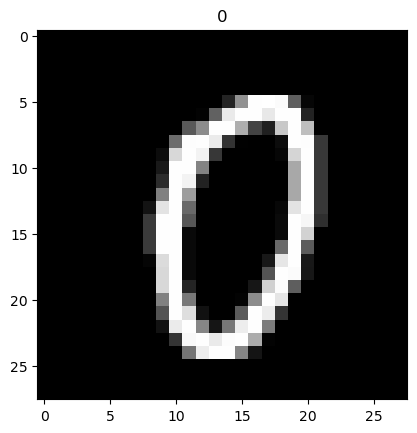

In [39]:
plt.imshow(X_train[1000], cmap='gray')
plt.title(y_train[1])
plt.show()

In [40]:
X_train.shape

(60000, 28, 28, 1)

In [41]:
##Creating Model

In [42]:
from keras.layers import Dense, Conv2D, AveragePooling2D, Flatten
from keras.models import Sequential

In [43]:
model = Sequential()

In [44]:
model.add(Conv2D(filters = 4, kernel_size = (5,5), activation='relu' ,input_shape =(28,28,1)))
model.add(AveragePooling2D(pool_size = (2,2)))

model.add(Conv2D(filters = 4, kernel_size=(7,7), activation='relu'))
model.add(AveragePooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(units = 10, activation='softmax'))


In [50]:
model.compile(loss="sparse_categorical_crossentropy", optimizer = 'adam', metrics=['acc'])

In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 24, 24, 4)         104       
                                                                 
 average_pooling2d_2 (Averag  (None, 12, 12, 4)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 6, 4)           788       
                                                                 
 average_pooling2d_3 (Averag  (None, 3, 3, 4)          0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 36)                0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [52]:
model.fit(X_train, y_train, epochs=1, batch_size = 1 )

60000/60000 [==============================] - 152s 3ms/step - loss: 0.3252 - acc: 0.9039


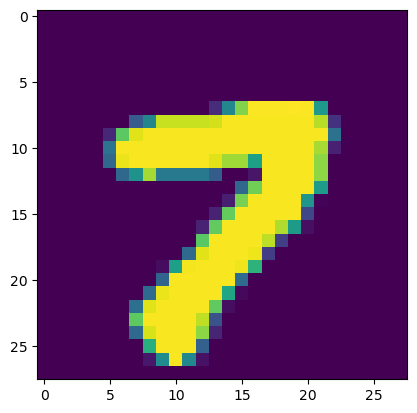

In [62]:
plt.imshow(X_test[79])

In [63]:
test = X_test[0].reshape(-1,28,28,1)

In [66]:
model.predict(test)

1/1 [==============================] - 0s 200ms/step


array([[4.8790162e-07, 2.9226496e-07, 2.1003561e-04, 1.7789732e-07,
        2.1171939e-14, 5.3442988e-12, 1.3931026e-18, 9.9977070e-01,
        3.6545192e-08, 1.8388026e-05]], dtype=float32)

In [67]:
model.save("./my_model.h5")